# **Flight Price Prediction**


**Objective**
* Predict flight ticket prices based on date, destination, and other factors.

**Data collection:**
* the datasets are collected from Kaggle: Flight Price Prediction uploaded by Shubham Bathwal

 > ## Data Cleaning


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv('Clean_Dataset.csv')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


```count the number of missing (null) values in each column of a DataFrame.```

In [2]:
df.isnull().sum() 

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

```to identify and count the number of duplicate rows in a DataFrame.```

In [3]:
df.duplicated().sum() #used to identify and count the number of duplicate rows in a DataFrame.



np.int64(0)

``` since source and destination city has no effect on our datasets so deleting it as the source city is Delhi and Destination city is Mumbai ```

In [4]:
df = df.drop(columns=['source_city','destination_city'])
df.head()

,Unnamed: 0,airline,flight,departure_time,stops,arrival_time,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Evening,zero,Night,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Early_Morning,zero,Morning,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Early_Morning,zero,Early_Morning,Economy,2.17,1,5956
3,3,Vistara,UK-995,Morning,zero,Afternoon,Economy,2.25,1,5955
4,4,Vistara,UK-963,Morning,zero,Morning,Economy,2.33,1,5955


In [5]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'departure_time', 'stops',
       'arrival_time', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

In [6]:
categorical_variables = df.dtypes[df.dtypes == "object"].index
categorical_variables

Index(['airline', 'flight', 'departure_time', 'stops', 'arrival_time',
       'class'],
      dtype='object')

In [7]:
for category in categorical_variables:
    print(f"Number of unique values in {category} = {len(df[category].unique())}")

Number of unique values in airline = 6
Number of unique values in flight = 1561
Number of unique values in departure_time = 6
Number of unique values in stops = 3
Number of unique values in arrival_time = 6
Number of unique values in class = 2


since the number of flight is very high so ignoring it 

In [8]:
df = df.drop(columns=['flight'])
df.head()

,Unnamed: 0,airline,departure_time,stops,arrival_time,class,duration,days_left,price
0,0,SpiceJet,Evening,zero,Night,Economy,2.17,1,5953
1,1,SpiceJet,Early_Morning,zero,Morning,Economy,2.33,1,5953
2,2,AirAsia,Early_Morning,zero,Early_Morning,Economy,2.17,1,5956
3,3,Vistara,Morning,zero,Afternoon,Economy,2.25,1,5955
4,4,Vistara,Morning,zero,Morning,Economy,2.33,1,5955


In [9]:
df=df.rename(columns={'Unnamed: 0': 'index'})
df.head()

,index,airline,departure_time,stops,arrival_time,class,duration,days_left,price
0,0,SpiceJet,Evening,zero,Night,Economy,2.17,1,5953
1,1,SpiceJet,Early_Morning,zero,Morning,Economy,2.33,1,5953
2,2,AirAsia,Early_Morning,zero,Early_Morning,Economy,2.17,1,5956
3,3,Vistara,Morning,zero,Afternoon,Economy,2.25,1,5955
4,4,Vistara,Morning,zero,Morning,Economy,2.33,1,5955


> ONE-HOT ENCODING

In [10]:

# List of categorical variables to be ((one-hot encoded))
categorical_variables = ['airline', 'departure_time', 'stops', 'arrival_time', 'class']

# Convert categorical variables to dummy variables
df_clean_encoded = pd.get_dummies(df, columns=categorical_variables, drop_first=False)

print("Encoded DataFrame:")
df_clean_encoded = df_clean_encoded.astype(int) # 0== false 1==true
print(df_clean_encoded)

Encoded DataFrame:
         index  duration  days_left  price  airline_AirAsia  \
0            0         2          1   5953                0   
1            1         2          1   5953                0   
2            2         2          1   5956                1   
3            3         2          1   5955                0   
4            4         2          1   5955                0   
...        ...       ...        ...    ...              ...   
300148  300148        10         49  69265                0   
300149  300149        10         49  77105                0   
300150  300150        13         49  79099                0   
300151  300151        10         49  81585                0   
300152  300152        10         49  81585                0   

        airline_Air_India  airline_GO_FIRST  airline_Indigo  airline_SpiceJet  \
0                       0                 0               0                 1   
1                       0                 0               0   

In [11]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

> Saving the cleaned dataset

In [12]:

df_clean_encoded.to_csv("flight_encoded.csv", index=False)

In [13]:
df = pd.read_csv('flight_encoded.csv')
df.head()

,index,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy
0,0,2,1,5953,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
1,1,2,1,5953,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
2,2,2,1,5956,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,3,2,1,5955,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
4,4,2,1,5955,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1


## EDA

```Distribution of price```

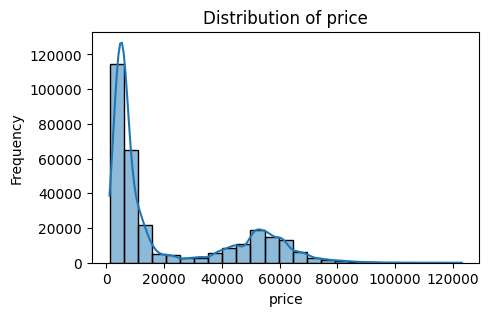

In [14]:
plt.figure(figsize=(5, 3)) # Figsize(width, height)
sns.histplot(data=df["price"], bins=25, kde=True) 
plt.title('Distribution of price')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

### ```Correlation Matrix```

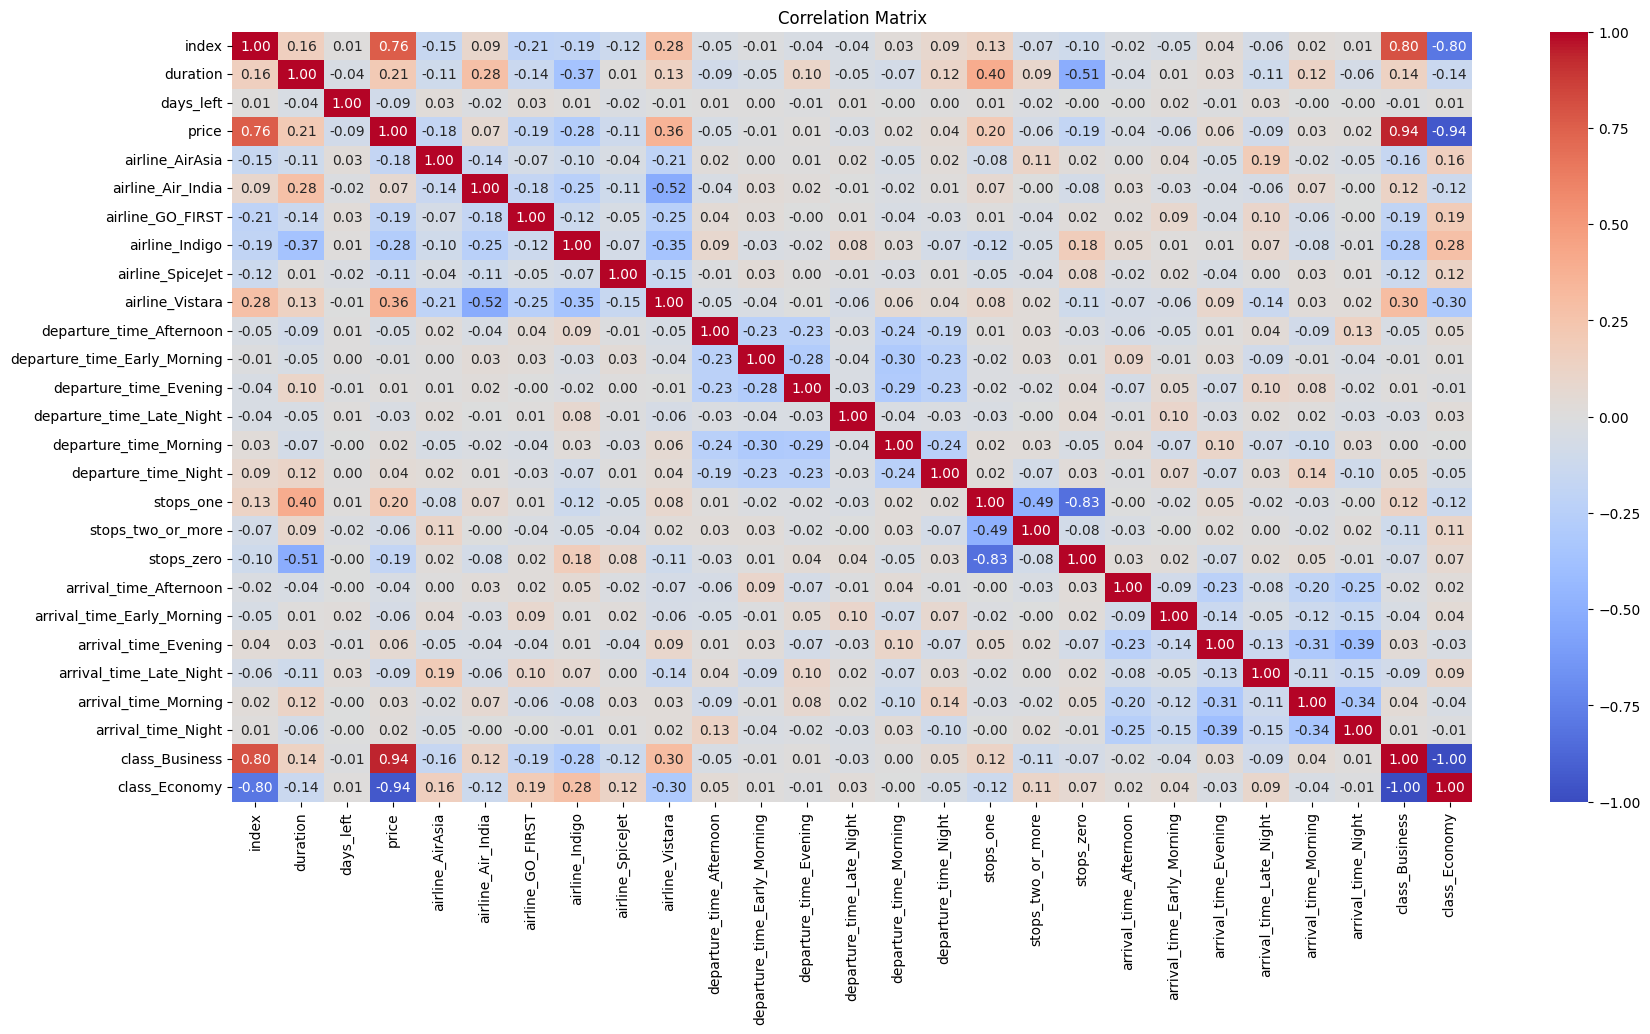

In [15]:
plt.figure(figsize=(20, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

> our major objective is to findout the price of airline so we are interested in column price so now we observe how others factors or columns affect the price

> ### OUTLIERS HANDLING

Filtered Data Shape After Outlier Removal:  (298834, 27)


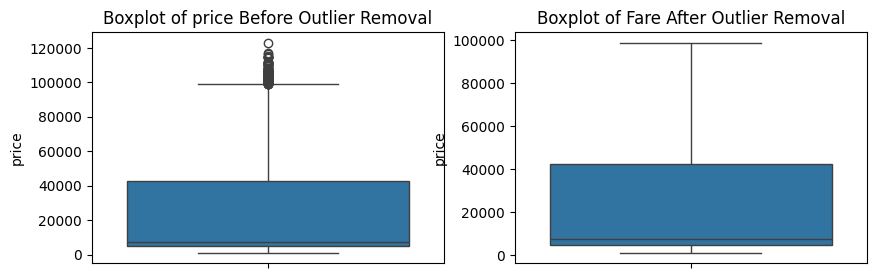

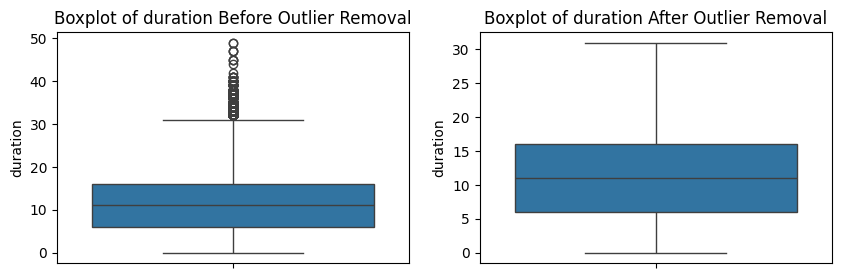

In [16]:
#1. Removal of outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

columns_to_check = ['price','duration','days_left']
filtered_df = df.copy()

for column in columns_to_check:
    filtered_df = remove_outliers(filtered_df, column)
    
print("Filtered Data Shape After Outlier Removal: ", filtered_df.shape)

# Visualization of box plot before and after outlier treatment
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(data=df["price"])
plt.title('Boxplot of price Before Outlier Removal')

plt.subplot(1, 2, 2)
sns.boxplot(data=filtered_df["price"])
plt.title('Boxplot of Fare After Outlier Removal')
plt.show()

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(data=df["duration"])
plt.title('Boxplot of duration Before Outlier Removal')

plt.subplot(1, 2, 2)
sns.boxplot(data=filtered_df["duration"])
plt.title('Boxplot of duration After Outlier Removal')
plt.show()

> # EDA Task

# ``` Q 1 a```
## ```Price vs Days left```


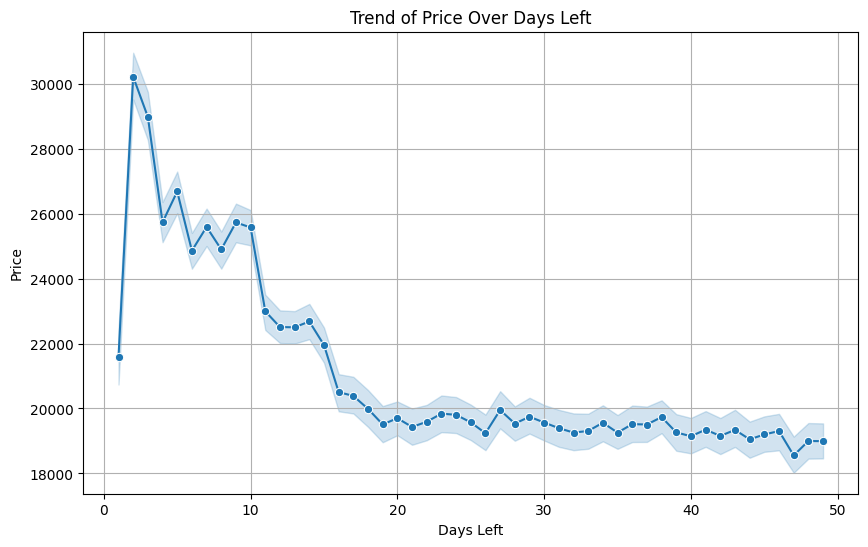

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='days_left', y='price', data=df, marker='o')
plt.title('Trend of Price Over Days Left')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# ``` Q1 b```
## ```Impacts of Stops on price```

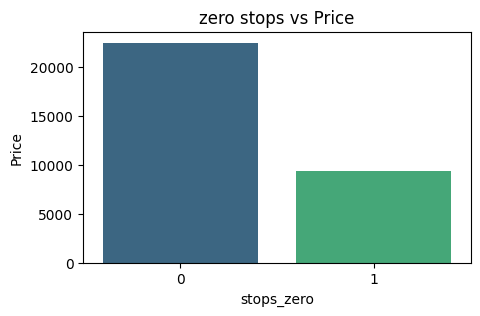

In [18]:
plt.figure(figsize=(5, 3))
sns.barplot(x='stops_zero', y='price', data=df, palette='viridis', ci=None)
plt.title("zero stops vs Price")
plt.xlabel("stops_zero")
plt.ylabel("Price")
plt.show()

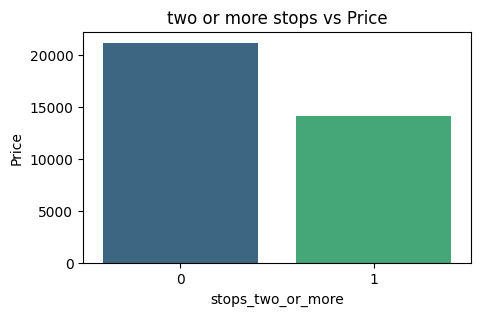

In [19]:
plt.figure(figsize=(5, 3))
sns.barplot(x='stops_two_or_more', y='price', data=df, palette='viridis', ci=None)
plt.title("two or more stops vs Price")
plt.xlabel("stops_two_or_more")
plt.ylabel("Price")
plt.show()

# ``` Q1 C ```
## ``` Departure and Arrival Time influence```

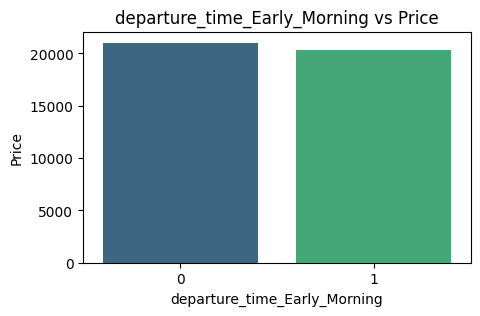

In [20]:
plt.figure(figsize=(5, 3))
sns.barplot(x='departure_time_Early_Morning', y='price', data=df, palette='viridis', ci=None)
plt.title("departure_time_Early_Morning vs Price")
plt.xlabel("departure_time_Early_Morning")
plt.ylabel("Price")
plt.show()

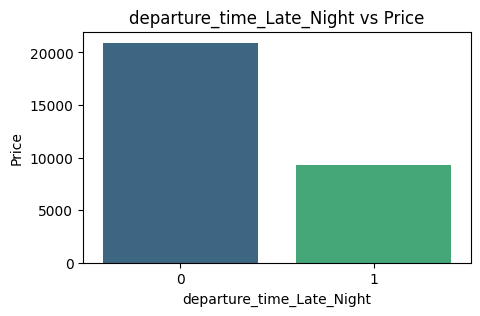

In [21]:
plt.figure(figsize=(5, 3))
sns.barplot(x='departure_time_Late_Night', y='price', data=df, palette='viridis', ci=None)
plt.title("departure_time_Late_Night vs Price")
plt.xlabel("departure_time_Late_Night")
plt.ylabel("Price")
plt.show()

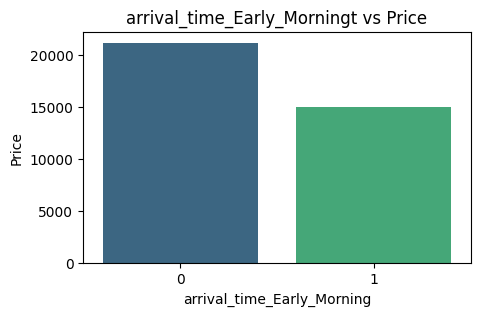

In [22]:
plt.figure(figsize=(5, 3))
sns.barplot(x='arrival_time_Early_Morning', y='price', data=df, palette='viridis', ci=None)
plt.title("arrival_time_Early_Morningt vs Price")
plt.xlabel("arrival_time_Early_Morning")
plt.ylabel("Price")
plt.show()

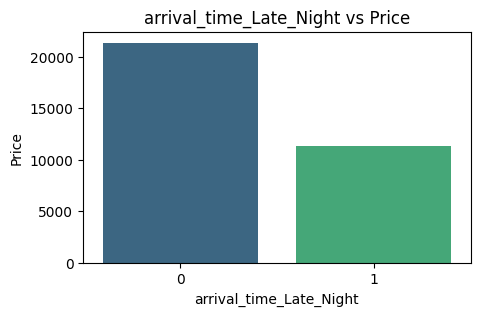

In [23]:
plt.figure(figsize=(5, 3))
sns.barplot(x='arrival_time_Late_Night', y='price', data=df, palette='viridis', ci=None)
plt.title("arrival_time_Late_Night vs Price")
plt.xlabel("arrival_time_Late_Night")
plt.ylabel("Price")
plt.show()

> # Q 2 b
## ```Airline VS Class pricing```

In [24]:
import pandas as pd

# Step 1: Filter rows where airline_spicejet == 1
spicejet_data = df[df['airline_SpiceJet'] == 1]

# Step 2: Filter for Economy class
economy_prices = spicejet_data[spicejet_data['class_Economy'] == 1]['price']

# Step 3: Filter for Business class
business_prices = spicejet_data[spicejet_data['class_Business'] == 1]['price']

# Step 4: Calculate the median (or other statistics) for Economy and Business classes
median_economy_price = economy_prices.median()
median_business_price = business_prices.median()

# Print the median prices for each class
print(f"Median price for Economy class: {median_economy_price}")
print(f"Median price for Business class: {median_business_price}")




Median price for Economy class: 5654.0
Median price for Business class: nan


```the median price of business class is Nan beacause the airline doesnot provide business class facility```

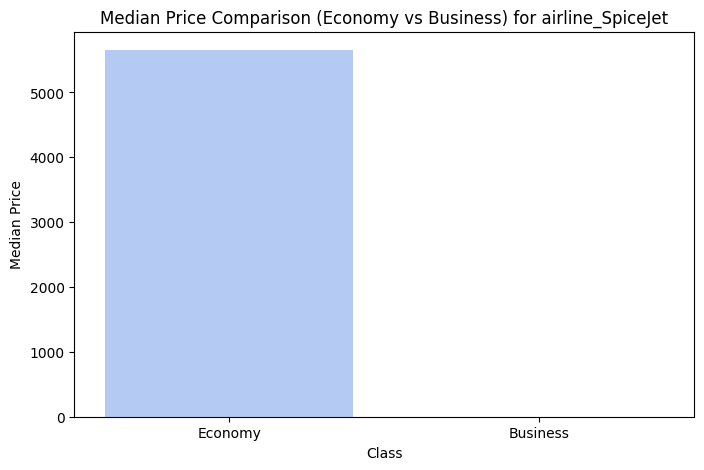

In [25]:
price_data = pd.DataFrame({
    'Class': ['Economy', 'Business'],
    'Price': [median_economy_price, median_business_price]
})

# Bar Plot for Median Prices
plt.figure(figsize=(8, 5))
sns.barplot(x='Class', y='Price', data=price_data, palette='coolwarm')
plt.title('Median Price Comparison (Economy vs Business) for airline_SpiceJet')
plt.xlabel('Class')
plt.ylabel('Median Price')
plt.show()

In [26]:
import pandas as pd

# Step 1: Filter rows where airline_AirAsia == 1
AirAsia_data = df[df['airline_AirAsia'] == 1]

# Step 2: Filter for Economy class
economy_prices = AirAsia_data[AirAsia_data['class_Economy'] == 1]['price']

# Step 3: Filter for Business class
business_prices = AirAsia_data[AirAsia_data['class_Business'] == 1]['price']

# Step 4: Calculate the median (or other statistics) for Economy and Business classes
median_economy_price = economy_prices.median()
median_business_price = business_prices.median()

# Print the median prices for each class
print(f"Median price for Economy class: {median_economy_price}")
print(f"Median price for Business class: {median_business_price}")

Median price for Economy class: 3276.0
Median price for Business class: nan


```the median price of business class is Nan beacause the airline doesnot provide business class facility```

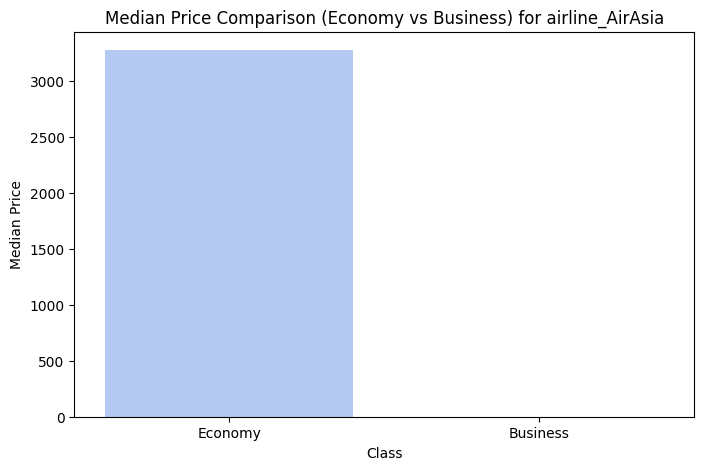

In [27]:
price_data = pd.DataFrame({
    'Class': ['Economy', 'Business'],
    'Price': [median_economy_price, median_business_price]
})

# Bar Plot for Median Prices
plt.figure(figsize=(8, 5))
sns.barplot(x='Class', y='Price', data=price_data, palette='coolwarm')
plt.title('Median Price Comparison (Economy vs Business) for airline_AirAsia')
plt.xlabel('Class')
plt.ylabel('Median Price')
plt.show()

In [28]:
import pandas as pd

# Step 1: Filter rows where airline_Air_India == 1
AirIndia_data = df[df['airline_Air_India'] == 1]

# Step 2: Filter for Economy class
economy_prices = AirIndia_data[AirIndia_data['class_Economy'] == 1]['price']

# Step 3: Filter for Business class
business_prices = AirIndia_data[AirIndia_data['class_Business'] == 1]['price']

# Step 4: Calculate the median (or other statistics) for Economy and Business classes
median_economy_price = economy_prices.median()
median_business_price = business_prices.median()

# Print the median prices for each class
print(f"Median price for Economy class: {median_economy_price}")
print(f"Median price for Business class: {median_business_price}")

Median price for Economy class: 6082.0
Median price for Business class: 49613.0


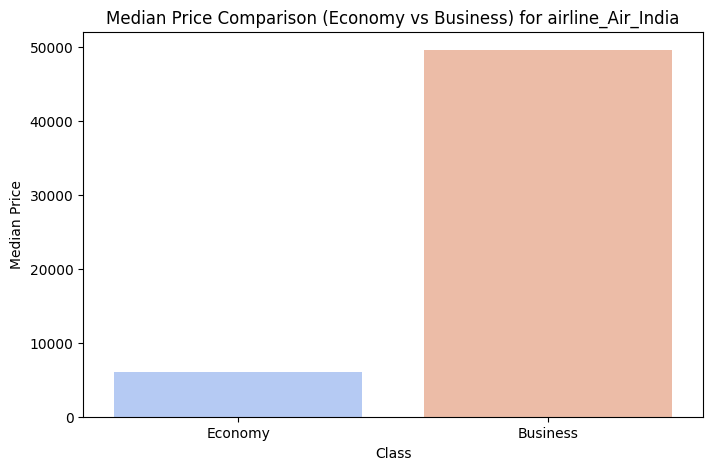

In [29]:
price_data = pd.DataFrame({
    'Class': ['Economy', 'Business'],
    'Price': [median_economy_price, median_business_price]
})

# Bar Plot for Median Prices
plt.figure(figsize=(8, 5))
sns.barplot(x='Class', y='Price', data=price_data, palette='coolwarm')
plt.title('Median Price Comparison (Economy vs Business) for airline_Air_India')
plt.xlabel('Class')
plt.ylabel('Median Price')
plt.show()

In [30]:
import pandas as pd

# Step 1: Filter rows where airline_AGO_FIRST == 1
GO_FIRST_data = df[df['airline_GO_FIRST'] == 1]

# Step 2: Filter for Economy class
economy_prices = GO_FIRST_data[GO_FIRST_data['class_Economy'] == 1]['price']

# Step 3: Filter for Business class
business_prices = GO_FIRST_data[GO_FIRST_data['class_Business'] == 1]['price']

# Step 4: Calculate the median (or other statistics) for Economy and Business classes
median_economy_price = economy_prices.median()
median_business_price = business_prices.median()

# Print the median prices for each class
print(f"Median price for Economy class: {median_economy_price}")
print(f"Median price for Business class: {median_business_price}")

Median price for Economy class: 5336.0
Median price for Business class: nan


```the median price of business class is Nan beacause the airline doesnot provide business class facility```

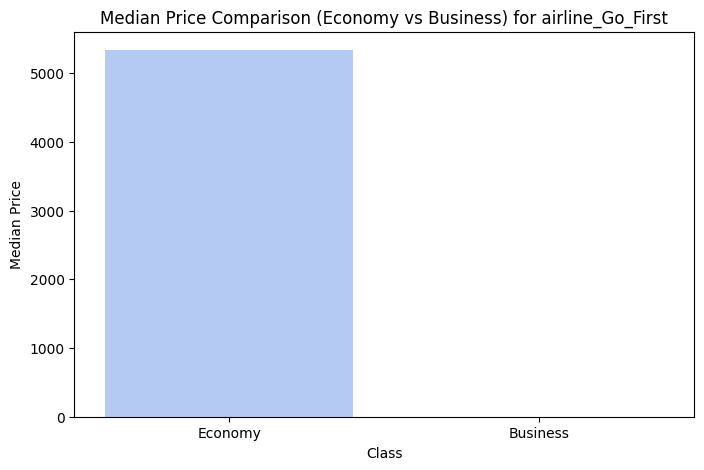

In [31]:
price_data = pd.DataFrame({
    'Class': ['Economy', 'Business'],
    'Price': [median_economy_price, median_business_price]
})

# Bar Plot for Median Prices
plt.figure(figsize=(8, 5))
sns.barplot(x='Class', y='Price', data=price_data, palette='coolwarm')
plt.title('Median Price Comparison (Economy vs Business) for airline_Go_First')
plt.xlabel('Class')
plt.ylabel('Median Price')
plt.show()

In [32]:
import pandas as pd

# Step 1: Filter rows where airline_Indigo == 1
Indigo_data = df[df['airline_Indigo'] == 1]

# Step 2: Filter for Economy class
economy_prices = Indigo_data[Indigo_data['class_Economy'] == 1]['price']

# Step 3: Filter for Business class
business_prices = Indigo_data[Indigo_data['class_Business'] == 1]['price']

# Step 4: Calculate the median (or other statistics) for Economy and Business classes
median_economy_price = economy_prices.median()
median_business_price = business_prices.median()

# Print the median prices for each class
print(f"Median price for Economy class: {median_economy_price}")
print(f"Median price for Business class: {median_business_price}")

Median price for Economy class: 4453.0
Median price for Business class: nan


```the median price of business class is Nan beacause the airline doesnot provide business class facility```

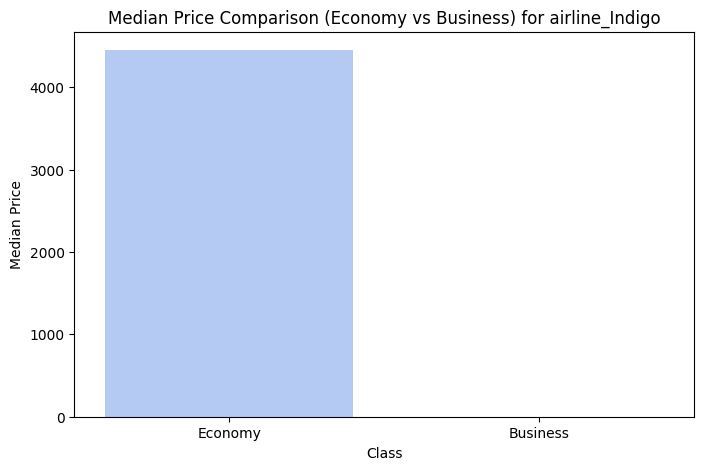

In [33]:
price_data = pd.DataFrame({
    'Class': ['Economy', 'Business'],
    'Price': [median_economy_price, median_business_price]
})

# Bar Plot for Median Prices
plt.figure(figsize=(8, 5))
sns.barplot(x='Class', y='Price', data=price_data, palette='coolwarm')
plt.title('Median Price Comparison (Economy vs Business) for airline_Indigo')
plt.xlabel('Class')
plt.ylabel('Median Price')
plt.show()

In [34]:
import pandas as pd

# Step 1: Filter rows where airline_Vistara == 1
Vistara_data = df[df['airline_Vistara'] == 1]

# Step 2: Filter for Economy class
economy_prices = Vistara_data[Vistara_data['class_Economy'] == 1]['price']

# Step 3: Filter for Business class
business_prices = Vistara_data[Vistara_data['class_Business'] == 1]['price']

# Step 4: Calculate the median (or other statistics) for Economy and Business classes
median_economy_price = economy_prices.median()
median_business_price = business_prices.median()

# Print the median prices for each class
print(f"Median price for Economy class: {median_economy_price}")
print(f"Median price for Business class: {median_business_price}")

Median price for Economy class: 6461.0
Median price for Business class: 56588.0


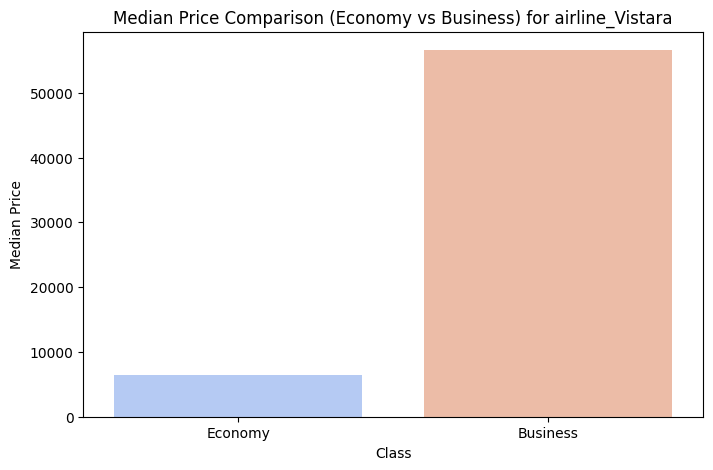

In [35]:
price_data = pd.DataFrame({
    'Class': ['Economy', 'Business'],
    'Price': [median_economy_price, median_business_price]
})

# Bar Plot for Median Prices
plt.figure(figsize=(8, 5))
sns.barplot(x='Class', y='Price', data=price_data, palette='coolwarm')
plt.title('Median Price Comparison (Economy vs Business) for airline_Vistara')
plt.xlabel('Class')
plt.ylabel('Median Price')
plt.show()

# ```Q 2 c```
## ```Duration VS Price Relationship```

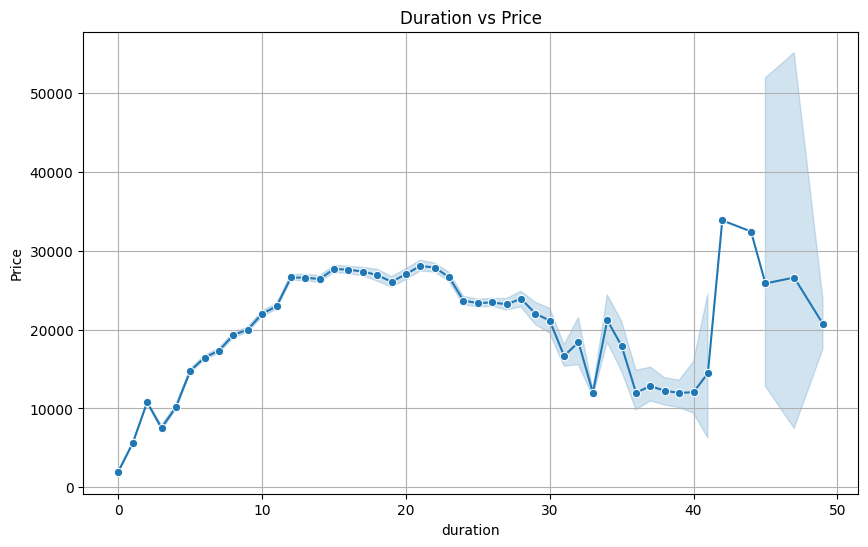

In [36]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='duration', y='price', data=df, marker='o')
plt.title('Duration vs Price')
plt.xlabel('duration')
plt.ylabel('Price')
plt.grid(True)
plt.show()

> # Q3 NO seasonality in Flight prices


 # ```Q 4 b```
## ``` new feature [price per hour of travel] for each airline```

In [37]:
import pandas as pd

# Filter the DataFrame for SpiceJet flights
spicejet_df = df[df['airline_SpiceJet'] == 1].copy()

# Create the new feature 'price_per_hour' for SpiceJet
spicejet_df['price_per_hour'] = spicejet_df['price'] / spicejet_df['duration']



# Calculate the average price_per_hour for SpiceJet
average_price_per_hour_spicejet = spicejet_df['price_per_hour'].mean()

# Print the average price_per_hour for SpiceJet
print("\nAverage price_per_hour for SpiceJet:")
print(average_price_per_hour_spicejet)

df['avg_price_per_hour_Spicejet'] = 0  # Default to zero
df.loc[df['airline_SpiceJet'] == 1, 'avg_price_per_hour_Spicejet'] = average_price_per_hour_spicejet


Average price_per_hour for SpiceJet:
1128.5985593038274


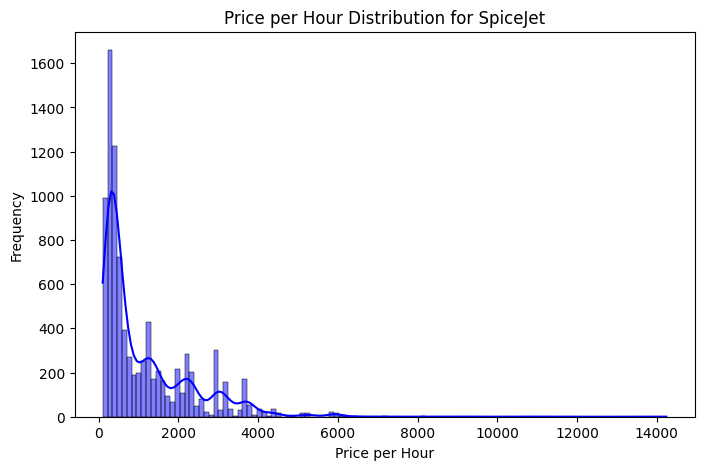

In [38]:
plt.figure(figsize=(8, 5))
sns.histplot(spicejet_df['price_per_hour'], kde=True, color='blue')
plt.title('Price per Hour Distribution for SpiceJet')
plt.xlabel('Price per Hour')
plt.ylabel('Frequency')
plt.show()

In [39]:
import pandas as pd

# Filter the DataFrame for SpiceJet flights
AirAsia_df = df[df['airline_AirAsia'] == 1].copy()

# Create the new feature 'price_per_hour' for SpiceJet
AirAsia_df['price_per_hour'] = AirAsia_df['price'] / AirAsia_df['duration']

# Calculate the average price_per_hour for SpiceJet
average_price_per_hour_AirAsia = AirAsia_df['price_per_hour'].mean()

# Print the average price_per_hour for SpiceJet
print("\nAverage price_per_hour for AirAsia:")
print(average_price_per_hour_AirAsia)

df['avg_price_per_hour_AirAsia'] = 0  # Default to zero
df.loc[df['airline_AirAsia'] == 1, 'avg_price_per_hour_AirAsia'] = average_price_per_hour_AirAsia


Average price_per_hour for AirAsia:
inf


```the average price may be infinite due to duration being zero in some of the data rows```

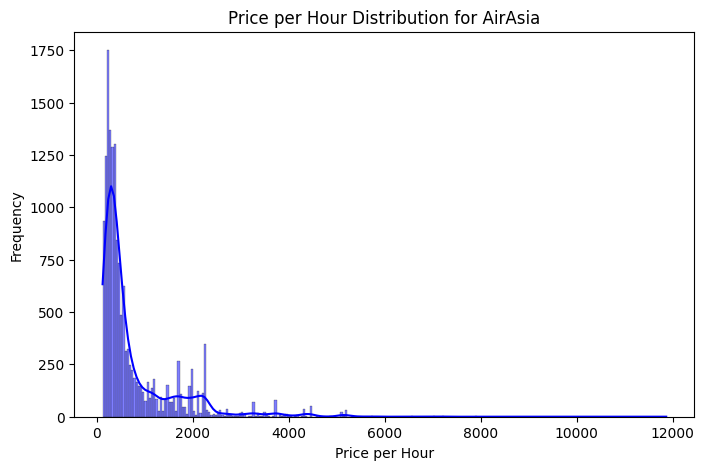

In [40]:
plt.figure(figsize=(8, 5))
sns.histplot(AirAsia_df['price_per_hour'], kde=True, color='blue')
plt.title('Price per Hour Distribution for AirAsia')
plt.xlabel('Price per Hour')
plt.ylabel('Frequency')
plt.show()

In [41]:
import pandas as pd

# Filter the DataFrame for SpiceJet flights
AirIndia_df = df[df['airline_Air_India'] == 1].copy()

# Create the new feature 'price_per_hour' for SpiceJet
AirIndia_df['price_per_hour'] = AirIndia_df['price'] / AirIndia_df['duration']

# Calculate the average price_per_hour for SpiceJet
average_price_per_hour_AirIndia = AirIndia_df['price_per_hour'].mean()

# Print the average price_per_hour for SpiceJet
print("\nAverage price_per_hour for AirIndia:")
print(average_price_per_hour_AirIndia)

df['avg_price_per_hour_AirIndia'] = 0  # Default to zero
df.loc[df['airline_Air_India'] == 1, 'avg_price_per_hour_AirIndia'] = average_price_per_hour_AirIndia


Average price_per_hour for AirIndia:
2371.81196629079


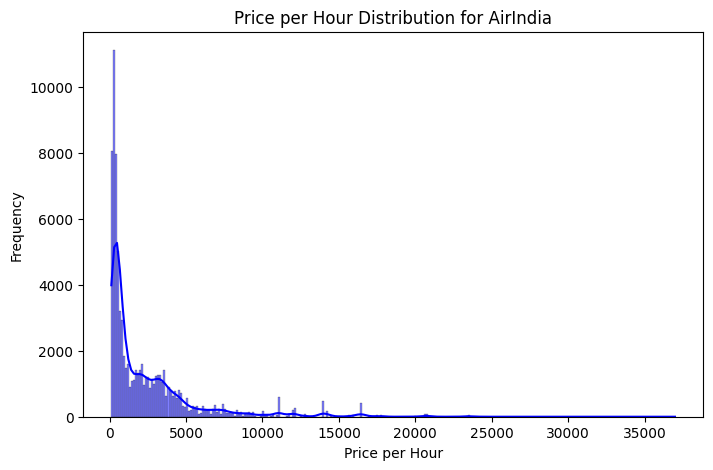

In [42]:
plt.figure(figsize=(8, 5))
sns.histplot(AirIndia_df['price_per_hour'], kde=True, color='blue')
plt.title('Price per Hour Distribution for AirIndia')
plt.xlabel('Price per Hour')
plt.ylabel('Frequency')
plt.show()

In [43]:
import pandas as pd

# Filter the DataFrame for SpiceJet flights
GO_FIRST_df = df[df['airline_GO_FIRST'] == 1].copy()

# Create the new feature 'price_per_hour' for SpiceJet
GO_FIRST_df['price_per_hour'] = GO_FIRST_df['price'] / GO_FIRST_df['duration']

# Calculate the average price_per_hour for SpiceJet
average_price_per_hour_GO_FIRST = GO_FIRST_df['price_per_hour'].mean()

# Print the average price_per_hour for SpiceJet
print("\nAverage price_per_hour for GO_FIRST:")
print(average_price_per_hour_GO_FIRST)

df['avg_price_per_hour_GoFirst'] = 0  # Default to zero
df.loc[df['airline_GO_FIRST'] == 1, 'avg_price_per_hour_GoFirst'] = average_price_per_hour_GO_FIRST


Average price_per_hour for GO_FIRST:
927.5975041755397


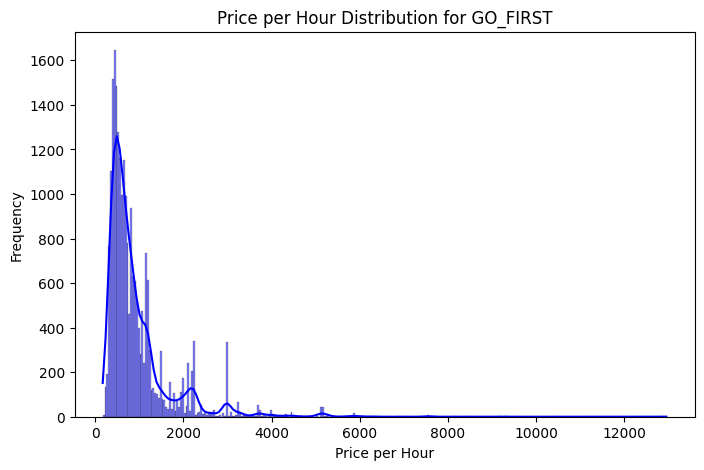

In [44]:
plt.figure(figsize=(8, 5))
sns.histplot(GO_FIRST_df['price_per_hour'], kde=True, color='blue')
plt.title('Price per Hour Distribution for GO_FIRST')
plt.xlabel('Price per Hour')
plt.ylabel('Frequency')
plt.show()

In [45]:
import pandas as pd

# Filter the DataFrame for SpiceJet flights
Indigo_df = df[df['airline_Indigo'] == 1].copy()

# Create the new feature 'price_per_hour' for SpiceJet
Indigo_df['price_per_hour'] = Indigo_df['price'] / Indigo_df['duration']

# Calculate the average price_per_hour for SpiceJet
average_price_per_hour_Indigo = Indigo_df['price_per_hour'].mean()

# Print the average price_per_hour for SpiceJet
print("\nAverage price_per_hour for Indigo:")
print(average_price_per_hour_Indigo)

df['avg_price_per_hour_Indigo'] = 0  # Default to zero
df.loc[df['airline_Indigo'] == 1, 'avg_price_per_hour_Indigo'] = average_price_per_hour_Indigo


Average price_per_hour for Indigo:
inf


```the average price may be infinite due to duration being zero in some of the data rows```

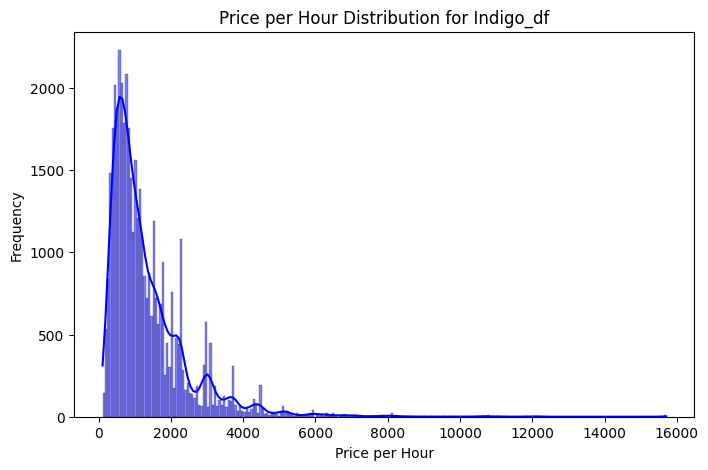

In [46]:
plt.figure(figsize=(8, 5))
sns.histplot(Indigo_df['price_per_hour'], kde=True, color='blue')
plt.title('Price per Hour Distribution for Indigo_df')
plt.xlabel('Price per Hour')
plt.ylabel('Frequency')
plt.show()

In [47]:
import pandas as pd

# Filter the DataFrame for SpiceJet flights
Vistara_df = df[df['airline_Vistara'] == 1].copy()

# Create the new feature 'price_per_hour' for SpiceJet
Vistara_df['price_per_hour'] = Vistara_df['price'] / Vistara_df['duration']

# Calculate the average price_per_hour for SpiceJet
average_price_per_hour__Vistara = Vistara_df['price_per_hour'].mean()

# Print the average price_per_hour for SpiceJet
print("\nAverage price_per_hour for _Vistara:")
print(average_price_per_hour__Vistara)



df['avg_price_per_hour_Vistara'] = 0  # Default to zero
df.loc[df['airline_Vistara'] == 1, 'avg_price_per_hour_Vistara'] = average_price_per_hour__Vistara




Average price_per_hour for _Vistara:
3334.691446346784


In [48]:
df

,index,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy,avg_price_per_hour_Spicejet,avg_price_per_hour_AirAsia,avg_price_per_hour_AirIndia,avg_price_per_hour_GoFirst,avg_price_per_hour_Indigo,avg_price_per_hour_Vistara
0,0,2,1,5953,0,0,0,0,1,0,...,0,1,0,1,1128.598559,0.0,0.0,0.0,0.0,0.000000
1,1,2,1,5953,0,0,0,0,1,0,...,1,0,0,1,1128.598559,0.0,0.0,0.0,0.0,0.000000
2,2,2,1,5956,1,0,0,0,0,0,...,0,0,0,1,0.000000,inf,0.0,0.0,0.0,0.000000
3,3,2,1,5955,0,0,0,0,0,1,...,0,0,0,1,0.000000,0.0,0.0,0.0,0.0,3334.691446
4,4,2,1,5955,0,0,0,0,0,1,...,1,0,0,1,0.000000,0.0,0.0,0.0,0.0,3334.691446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,10,49,69265,0,0,0,0,0,1,...,0,0,1,0,0.000000,0.0,0.0,0.0,0.0,3334.691446
300149,300149,10,49,77105,0,0,0,0,0,1,...,0,1,1,0,0.000000,0.0,0.0,0.0,0.0,3334.691446
300150,300150,13,49,79099,0,0,0,0,0,1,...,0,1,1,0,0.000000,0.0,0.0,0.0,0.0,3334.691446
300151,300151,10,49,81585,0,0,0,0,0,1,...,0,0,1,0,0.000000,0.0,0.0,0.0,0.0,3334.691446


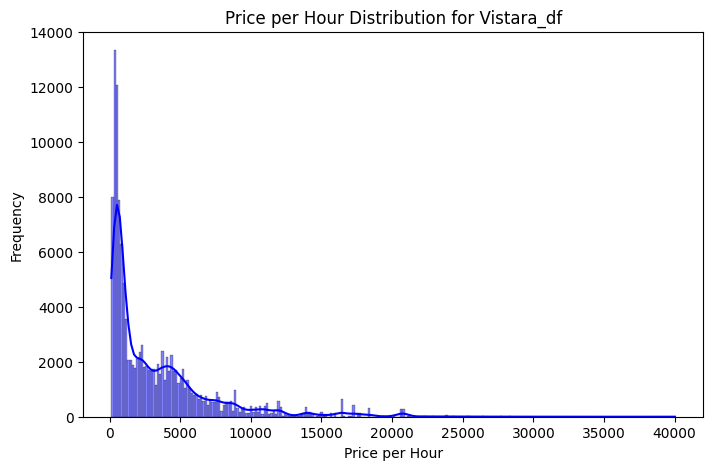

In [49]:
plt.figure(figsize=(8, 5))
sns.histplot(Vistara_df['price_per_hour'], kde=True, color='blue')
plt.title('Price per Hour Distribution for Vistara_df')
plt.xlabel('Price per Hour')
plt.ylabel('Frequency')
plt.show()

 # ```Q 4 a```
## ```Catergorization of airlines based on pricing patterns```

In [50]:
import pandas as pd

# Step 1: Filter the rows where airline_spicejet == 1
spicejet_prices = df[df['airline_SpiceJet'] == 1]['price']

# Step 2: Calculate the median price for those rows
median_price_spicejet = spicejet_prices.median()

# Print the median price
print(f"Median price for airline_spicejet : {median_price_spicejet}")

# Step 3: Categorize based on the median price
def categorize_airline(price):
    if price < 5000:  # Threshold for low-cost
        return 'Low-Cost'
    elif 5000 <= price < 10000:  # Threshold for mid-tier
        return 'Mid-Tier'
    else:  # For price above 10000, considered premium
        return 'Premium'

# Apply categorization to the median value
category = categorize_airline(median_price_spicejet)

# Print the category
print(f"Category based on median price: {category}")


Median price for airline_spicejet : 5654.0
Category based on median price: Mid-Tier


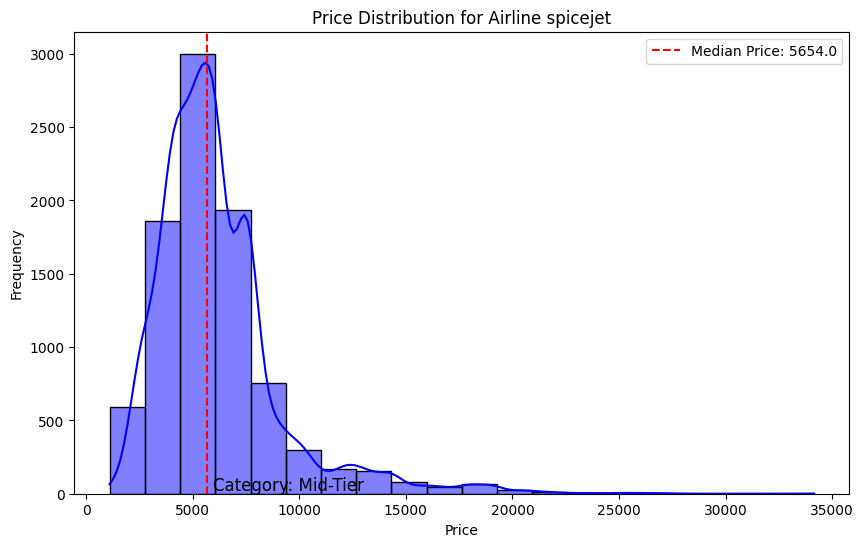

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(spicejet_prices, kde=True, color='blue', bins=20)
plt.axvline(median_price_spicejet, color='red', linestyle='--', label=f'Median Price: {median_price_spicejet}')
plt.title('Price Distribution for Airline spicejet')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Show the category as a label on the plot
plt.text(median_price_spicejet + 300, 20, f'Category: {category}', color='black', fontsize=12)

# Display the plot
plt.legend()
plt.show()

In [52]:
import pandas as pd

# Step 1: Filter the rows where airline_spicejet == 1
AirAsia_prices = df[df['airline_AirAsia'] == 1]['price']

# Step 2: Calculate the median price for those rows
median_price_AirAsia = AirAsia_prices.median()

# Print the median price
print(f"Median price for airline_AirAsia : {median_price_AirAsia}")

# Step 3: Categorize based on the median price
def categorize_airline(price):
    if price < 5000:  # Threshold for low-cost
        return 'Low-Cost'
    elif 5000 <= price < 10000:  # Threshold for mid-tier
        return 'Mid-Tier'
    else:  # For price above 10000, considered premium
        return 'Premium'

# Apply categorization to the median value
category = categorize_airline(median_price_AirAsia)

# Print the category
print(f"Category based on median price: {category}")

Median price for airline_AirAsia : 3276.0
Category based on median price: Low-Cost


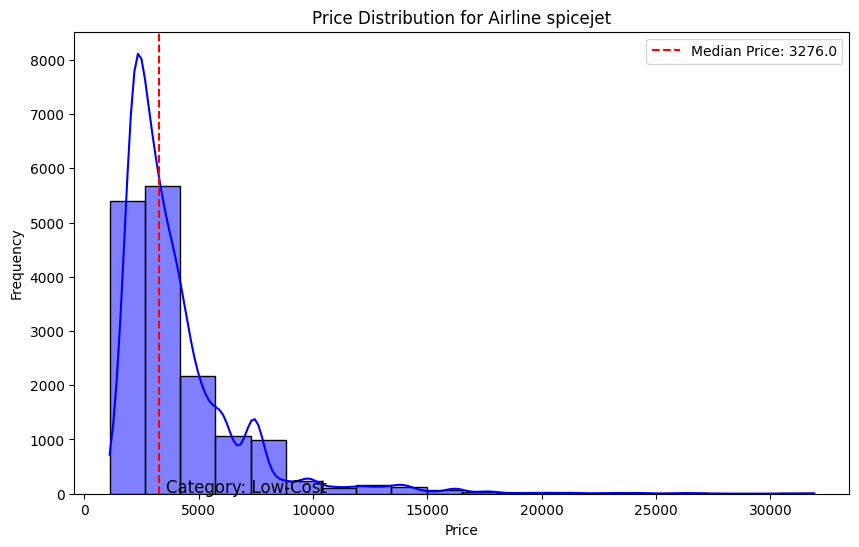

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(AirAsia_prices, kde=True, color='blue', bins=20)
plt.axvline(median_price_AirAsia, color='red', linestyle='--', label=f'Median Price: {median_price_AirAsia}')
plt.title('Price Distribution for Airline spicejet')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Show the category as a label on the plot
plt.text(median_price_AirAsia + 300, 20, f'Category: {category}', color='black', fontsize=12)

# Display the plot
plt.legend()
plt.show()

In [54]:
import pandas as pd

# Step 1: Filter the rows where airline_Air_India == 1
AirIndia_prices = df[df['airline_Air_India'] == 1]['price']

# Step 2: Calculate the median price for those rows
median_price_AirIndia = AirIndia_prices.median()

# Print the median price
print(f"Median price for airline_AirIndia : {median_price_AirIndia}")

# Step 3: Categorize based on the median price
def categorize_airline(price):
    if price < 5000:  # Threshold for low-cost
        return 'Low-Cost'
    elif 5000 <= price < 10000:  # Threshold for mid-tier
        return 'Mid-Tier'
    else:  # For price above 10000, considered premium
        return 'Premium'

# Apply categorization to the median value
category = categorize_airline(median_price_AirIndia)

# Print the category
print(f"Category based on median price: {category}")

Median price for airline_AirIndia : 11520.0
Category based on median price: Premium


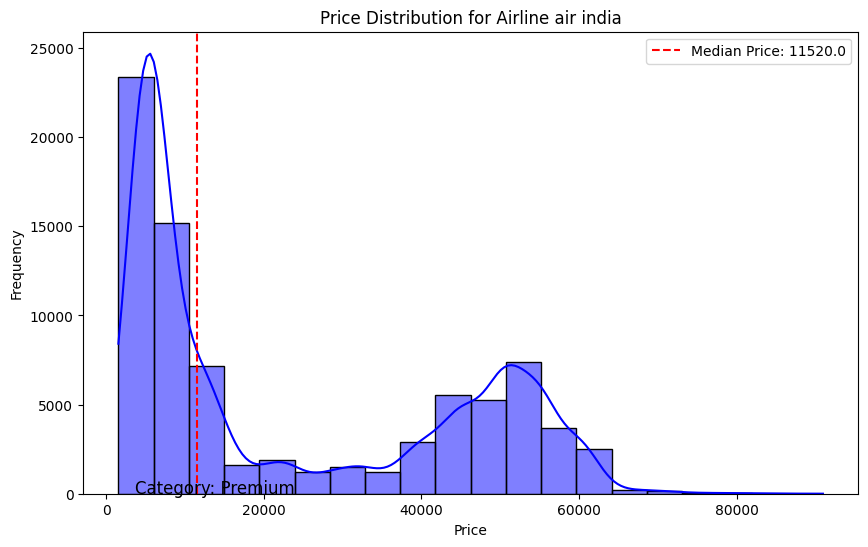

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(AirIndia_prices, kde=True, color='blue', bins=20)
plt.axvline(median_price_AirIndia, color='red', linestyle='--', label=f'Median Price: {median_price_AirIndia}')
plt.title('Price Distribution for Airline air india')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Show the category as a label on the plot
plt.text(median_price_AirAsia + 300, 20, f'Category: {category}', color='black', fontsize=12)

# Display the plot
plt.legend()
plt.show()

In [56]:
import pandas as pd

# Step 1: Filter the rows where airline_GO_FIRST == 1
GO_FIRST_prices = df[df['airline_GO_FIRST'] == 1]['price']

# Step 2: Calculate the median price for those rows
median_price_GO_FIRST = GO_FIRST_prices.median()

# Print the median price
print(f"Median price for airline_GO_FIRST : {median_price_GO_FIRST}")

# Step 3: Categorize based on the median price
def categorize_airline(price):
    if price < 5000:  # Threshold for low-cost
        return 'Low-Cost'
    elif 5000 <= price < 10000:  # Threshold for mid-tier
        return 'Mid-Tier'
    else:  # For price above 10000, considered premium
        return 'Premium'

# Apply categorization to the median value
category = categorize_airline(median_price_GO_FIRST)

# Print the category
print(f"Category based on median price: {category}")

Median price for airline_GO_FIRST : 5336.0
Category based on median price: Mid-Tier


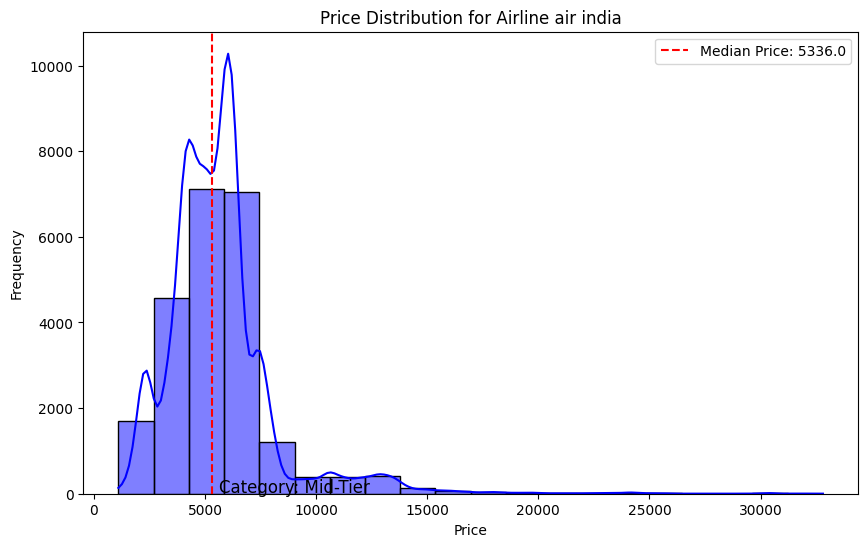

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(GO_FIRST_prices, kde=True, color='blue', bins=20)
plt.axvline(median_price_GO_FIRST, color='red', linestyle='--', label=f'Median Price: {median_price_GO_FIRST}')
plt.title('Price Distribution for Airline air india')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Show the category as a label on the plot
plt.text(median_price_GO_FIRST + 300, 20, f'Category: {category}', color='black', fontsize=12)

# Display the plot
plt.legend()
plt.show()

In [58]:
import pandas as pd

# Step 1: Filter the rows where airline_Indigo == 1
Indigo_prices = df[df['airline_Indigo'] == 1]['price']

# Step 2: Calculate the median price for those rows
median_price_Indigo = Indigo_prices.median()

# Print the median price
print(f"Median price for airline_Indigo : {median_price_Indigo}")

# Step 3: Categorize based on the median price
def categorize_airline(price):
    if price < 5000:  # Threshold for low-cost
        return 'Low-Cost'
    elif 5000 <= price < 10000:  # Threshold for mid-tier
        return 'Mid-Tier'
    else:  # For price above 10000, considered premium
        return 'Premium'

# Apply categorization to the median value
category = categorize_airline(median_price_GO_FIRST)

# Print the category
print(f"Category based on median price: {category}")

Median price for airline_Indigo : 4453.0
Category based on median price: Mid-Tier


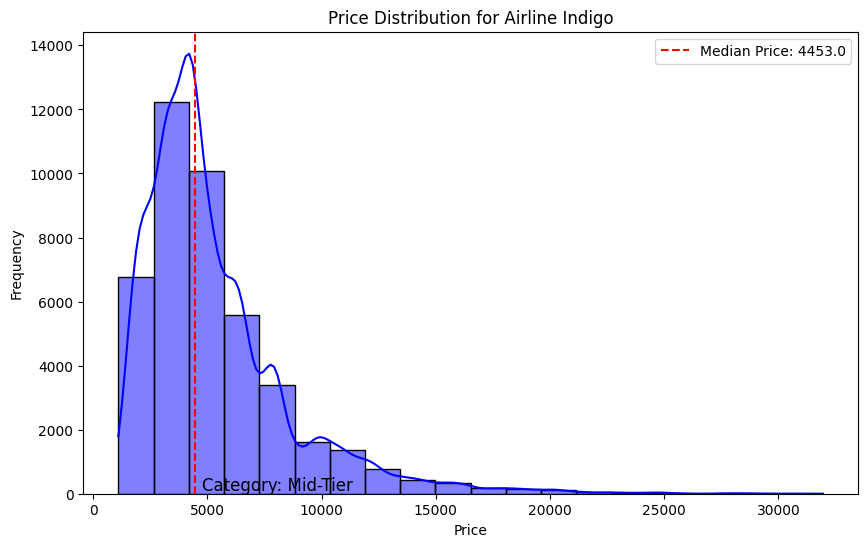

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(Indigo_prices, kde=True, color='blue', bins=20)
plt.axvline(median_price_Indigo, color='red', linestyle='--', label=f'Median Price: {median_price_Indigo}')
plt.title('Price Distribution for Airline Indigo')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Show the category as a label on the plot
plt.text(median_price_Indigo + 300, 100, f'Category: {category}', color='black', fontsize=12)

# Display the plot
plt.legend()
plt.show()

In [60]:
import pandas as pd

# Step 1: Filter the rows where airline_Vistara == 1
Vistara_prices = df[df['airline_Vistara'] == 1]['price']

# Step 2: Calculate the median price for those rows
median_price_Vistara = Vistara_prices.median()

# Print the median price
print(f"Median price for airline_Vistara : {median_price_Vistara}")

# Step 3: Categorize based on the median price
def categorize_airline(price):
    if price < 5000:  # Threshold for low-cost
        return 'Low-Cost'
    elif 5000 <= price < 10000:  # Threshold for mid-tier
        return 'Mid-Tier'
    else:  # For price above 10000, considered premium
        return 'Premium'

# Apply categorization to the median value
category = categorize_airline(median_price_Vistara)

# Print the category
print(f"Category based on median price: {category}")

Median price for airline_Vistara : 15543.0
Category based on median price: Premium


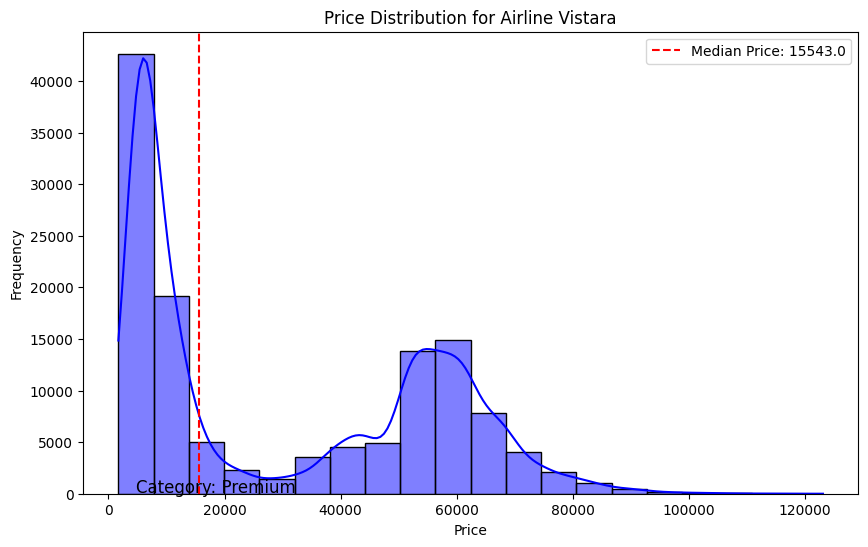

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(Vistara_prices, kde=True, color='blue', bins=20)
plt.axvline(median_price_Vistara, color='red', linestyle='--', label=f'Median Price: {median_price_Vistara}')
plt.title('Price Distribution for Airline Vistara')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Show the category as a label on the plot
plt.text(median_price_Indigo + 300, 100, f'Category: {category}', color='black', fontsize=12)

# Display the plot
plt.legend()
plt.show()

SKEWNESS CHECK

```skewness before scaling```

In [62]:
# Compute skewness for the 'price' column only
price_skew = df['price'].skew()
duration_skew=df['duration'].skew()
days_left_skew=df['days_left'].skew()


# Print the skewness value for 'price'
print("Skewness for 'price' column:", price_skew)
print("Skewness for 'duration' column:", duration_skew)
print("Skewness for 'days_left' column:", days_left_skew)


Skewness for 'price' column: 1.0613772532064343
Skewness for 'duration' column: 0.6013368207014413
Skewness for 'days_left' column: -0.03546434955066582


In [63]:
numeric_columns=['price','duration','days_left']


In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_numeric_columns = scaler.fit_transform(df[numeric_columns])

```skewness after scaling ``` 

In [65]:
numeric_columns=['price','duration','days_left']
df[numeric_columns].skew()


price        1.061377
duration     0.601337
days_left   -0.035464
dtype: float64

```since the skewness value ranges from -1 to 1 so the distribution is Normal```

In [66]:
df.to_csv("flight_encoded2.csv", index=False)

In [67]:
df=pd.read_csv('flight_encoded2.csv')
df.head()

,index,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy,avg_price_per_hour_Spicejet,avg_price_per_hour_AirAsia,avg_price_per_hour_AirIndia,avg_price_per_hour_GoFirst,avg_price_per_hour_Indigo,avg_price_per_hour_Vistara
0,0,2,1,5953,0,0,0,0,1,0,...,0,1,0,1,1128.598559,0.0,0.0,0.0,0.0,0.000000
1,1,2,1,5953,0,0,0,0,1,0,...,1,0,0,1,1128.598559,0.0,0.0,0.0,0.0,0.000000
2,2,2,1,5956,1,0,0,0,0,0,...,0,0,0,1,0.000000,inf,0.0,0.0,0.0,0.000000
3,3,2,1,5955,0,0,0,0,0,1,...,0,0,0,1,0.000000,0.0,0.0,0.0,0.0,3334.691446
4,4,2,1,5955,0,0,0,0,0,1,...,1,0,0,1,0.000000,0.0,0.0,0.0,0.0,3334.691446


# MODEL TRAINING


> importing necessary libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [83]:
df = pd.read_csv("flight_encoded2.csv")
df.head()


,index,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy,avg_price_per_hour_Spicejet,avg_price_per_hour_AirAsia,avg_price_per_hour_AirIndia,avg_price_per_hour_GoFirst,avg_price_per_hour_Indigo,avg_price_per_hour_Vistara
0,0,2,1,5953,0,0,0,0,1,0,...,0,1,0,1,1128.598559,0.0,0.0,0.0,0.0,0.000000
1,1,2,1,5953,0,0,0,0,1,0,...,1,0,0,1,1128.598559,0.0,0.0,0.0,0.0,0.000000
2,2,2,1,5956,1,0,0,0,0,0,...,0,0,0,1,0.000000,inf,0.0,0.0,0.0,0.000000
3,3,2,1,5955,0,0,0,0,0,1,...,0,0,0,1,0.000000,0.0,0.0,0.0,0.0,3334.691446
4,4,2,1,5955,0,0,0,0,0,1,...,1,0,0,1,0.000000,0.0,0.0,0.0,0.0,3334.691446


In [ ]:
# import numpy as np

# # Calculate the median, ignoring infinite values
# median_spicejet = df[df['avg_price_per_hour_Spicejet'] != np.inf]['avg_price_per_hour_Spicejet'].median()

# # Replace infinite values with the median
# df['avg_price_per_hour_Spicejet'].replace([np.inf, -np.inf], median_spicejet, inplace=True)


# import numpy as np

# # Calculate the median, ignoring infinite values
# median_airasia = df[df['avg_price_per_hour_AirAsia'] != np.inf]['avg_price_per_hour_AirAsia'].median()

# # Replace infinite values with the median
# df['avg_price_per_hour_AirAsia'].replace([np.inf, -np.inf],median_airasia, inplace=True)



# # Calculate the median, ignoring infinite values
# median_AirIndia = df[df['avg_price_per_hour_AirIndia'] != np.inf]['avg_price_per_hour_AirIndia'].median()

# # Replace infinite values with the median
# df['avg_price_per_hour_AirIndia'].replace([np.inf, -np.inf],median_AirIndia, inplace=True)


# # Calculate the median, ignoring infinite values
# median_GO_FIRST= df[df['avg_price_per_hour_GoFirst'] != np.inf]['avg_price_per_hour_GoFirst'].median()

# # Replace infinite values with the median
# df['avg_price_per_hour_GoFirst'].replace([np.inf, -np.inf],median_GO_FIRST, inplace=True)


# # Calculate the median, ignoring infinite values
# median_Indigo= df[df['avg_price_per_hour_Indigo'] != np.inf]['avg_price_per_hour_Indigo'].median()

# # Replace infinite values with the median
# df['avg_price_per_hour_Indigo'].replace([np.inf, -np.inf],median_Indigo, inplace=True)



# # Calculate the median, ignoring infinite values
# median_Vistara= df[df['avg_price_per_hour_Vistara'] != np.inf]['avg_price_per_hour_Vistara'].median()

# # Replace infinite values with the median
# df['avg_price_per_hour_Vistara'].replace([np.inf, -np.inf],median_Vistara, inplace=True)











In [82]:
df

,index,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy,avg_price_per_hour_Spicejet,avg_price_per_hour_AirAsia,avg_price_per_hour_AirIndia,avg_price_per_hour_GoFirst,avg_price_per_hour_Indigo,avg_price_per_hour_Vistara
0,0,2,1,5953,0,0,0,0,1,0,...,0,1,0,1,1128.598559,0.0,0.0,0.0,0.0,0.000000
1,1,2,1,5953,0,0,0,0,1,0,...,1,0,0,1,1128.598559,0.0,0.0,0.0,0.0,0.000000
2,2,2,1,5956,1,0,0,0,0,0,...,0,0,0,1,0.000000,0.0,0.0,0.0,0.0,0.000000
3,3,2,1,5955,0,0,0,0,0,1,...,0,0,0,1,0.000000,0.0,0.0,0.0,0.0,3334.691446
4,4,2,1,5955,0,0,0,0,0,1,...,1,0,0,1,0.000000,0.0,0.0,0.0,0.0,3334.691446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,10,49,69265,0,0,0,0,0,1,...,0,0,1,0,0.000000,0.0,0.0,0.0,0.0,3334.691446
300149,300149,10,49,77105,0,0,0,0,0,1,...,0,1,1,0,0.000000,0.0,0.0,0.0,0.0,3334.691446
300150,300150,13,49,79099,0,0,0,0,0,1,...,0,1,1,0,0.000000,0.0,0.0,0.0,0.0,3334.691446
300151,300151,10,49,81585,0,0,0,0,0,1,...,0,0,1,0,0.000000,0.0,0.0,0.0,0.0,3334.691446


In [72]:
df.dtypes

index                             int64
duration                          int64
days_left                         int64
price                             int64
airline_AirAsia                   int64
airline_Air_India                 int64
airline_GO_FIRST                  int64
airline_Indigo                    int64
airline_SpiceJet                  int64
airline_Vistara                   int64
departure_time_Afternoon          int64
departure_time_Early_Morning      int64
departure_time_Evening            int64
departure_time_Late_Night         int64
departure_time_Morning            int64
departure_time_Night              int64
stops_one                         int64
stops_two_or_more                 int64
stops_zero                        int64
arrival_time_Afternoon            int64
arrival_time_Early_Morning        int64
arrival_time_Evening              int64
arrival_time_Late_Night           int64
arrival_time_Morning              int64
arrival_time_Night                int64


In [84]:
df.columns

Index(['index', 'duration', 'days_left', 'price', 'airline_AirAsia',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'departure_time_Afternoon',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'stops_one', 'stops_two_or_more', 'stops_zero',
       'arrival_time_Afternoon', 'arrival_time_Early_Morning',
       'arrival_time_Evening', 'arrival_time_Late_Night',
       'arrival_time_Morning', 'arrival_time_Night', 'class_Business',
       'class_Economy', 'avg_price_per_hour_Spicejet',
       'avg_price_per_hour_AirAsia', 'avg_price_per_hour_AirIndia',
       'avg_price_per_hour_GoFirst', 'avg_price_per_hour_Indigo',
       'avg_price_per_hour_Vistara'],
      dtype='object')

In [85]:
X = df.drop(columns=['index'])

> average prices were dropped because some of the prices were too high.

In [86]:
X = df.drop(columns=['price','avg_price_per_hour_Spicejet','avg_price_per_hour_AirAsia','avg_price_per_hour_AirIndia','avg_price_per_hour_GoFirst','avg_price_per_hour_Indigo','avg_price_per_hour_Vistara'])  # Features columns
y = df['price'] # Target colums

```TRAIN AND TEST```

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [88]:
# Check nulls
print(X_train.isnull().sum())  
print( X_test.isnull().sum())

index                           0
duration                        0
days_left                       0
airline_AirAsia                 0
airline_Air_India               0
airline_GO_FIRST                0
airline_Indigo                  0
airline_SpiceJet                0
airline_Vistara                 0
departure_time_Afternoon        0
departure_time_Early_Morning    0
departure_time_Evening          0
departure_time_Late_Night       0
departure_time_Morning          0
departure_time_Night            0
stops_one                       0
stops_two_or_more               0
stops_zero                      0
arrival_time_Afternoon          0
arrival_time_Early_Morning      0
arrival_time_Evening            0
arrival_time_Late_Night         0
arrival_time_Morning            0
arrival_time_Night              0
class_Business                  0
class_Economy                   0
dtype: int64
index                           0
duration                        0
days_left                       0
a

In [89]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [90]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [91]:
y_pred = model.predict(X_test_scaled)


```FINDING MAE,MSE,R² ```

In [92]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 4590.380024132214
Mean Squared Error (MSE): 47378372.37391537
R² Score: 0.9080892306036102


> R² Score is closer to 1 , model explains variance well

## Conclusion
- model is performing well. it can explain 90% of the variation in the data.

> ## DEMO OF PRICE PREDICTION

In [93]:
data = [{
    'index': 0,
    'duration': 2,
    'days_left': 1,
    'airline_AirAsia': 0,
    'airline_Air_India': 0,
    'airline_GO_FIRST': 0,
    'airline_Indigo': 0,
    'airline_SpiceJet': 1,
    'airline_Vistara': 0,
    'departure_time_Afternoon': 1,
    'departure_time_Early_Morning': 0,
    'departure_time_Evening': 0,
    'departure_time_Late_Night': 0,
    'departure_time_Morning': 0,
    'departure_time_Night': 0,
    'stops_one': 1,
    'stops_two_or_more': 0,
    'stops_zero': 0,
    'arrival_time_Afternoon': 0,
    'arrival_time_Early_Morning': 0,
    'arrival_time_Evening': 1,
    'arrival_time_Late_Night': 0,
    'arrival_time_Morning': 0,
    'arrival_time_Night': 0,
    'class_Business': 0,
    'class_Economy': 1
}]

# Create DataFrame
df = pd.DataFrame(data)

# Display DataFrame
df


,index,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,departure_time_Afternoon,...,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy
0,0,2,1,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1


In [94]:
X_train_scaled = scaler.fit_transform(df)
y_pred = model.predict(X_train_scaled)
print("the predicted price of flight is ",y_pred)

the predicted price of flight is  [20888.57241735]
